# Import Libraries and Data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


# Data Cleaning

In [4]:
df=df.drop(columns=['id','Name','Working Professional or Student'],axis=1)
# deleted Working Professional or Student  as it will create multicollinearity issue with Profession
df.dtypes

Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [5]:
df.isnull().sum()

Gender                                        0
Age                                           0
City                                          0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [6]:
df=df.drop(['Academic Pressure','Study Satisfaction','CGPA'],axis=1)
df = df.dropna(subset=['Dietary Habits','Degree','Financial Stress'])

In [7]:
# Filling the missing values with the most frequent

#Profession
df.Profession.unique()
df['Profession']=df.Profession.str.lower()
most_freq_val = df.Profession.mode()[0]
df_prof_wrong_val=['yogesh','profession','familyvirar','patna','unveil','nagpur','pranav','visakhapatnam','yuvraj']
df['Profession']= df['Profession'].apply(lambda x :most_freq_val if x in df_prof_wrong_val or pd.isna(x) else x)

# Job Satisfaction
most_freq_val = df['Job Satisfaction'].mode()[0]
df['Job Satisfaction'] = df['Job Satisfaction'].apply(lambda x: most_freq_val if pd.isna(x) else x )

#Work Pressure
most_freq_val = df['Work Pressure'].mode()[0]
df['Work Pressure']=df['Work Pressure'].apply(lambda x : most_freq_val if pd.isna(x) else x)

#City
df['City']=df.City.str.lower()
wrong_city=['krishna', 'aishwarya', 'keshav', 'harsha', 'nalini', 'aditya', 'malyansh', 'raghavendra', 'saanvi', 
            'm.tech', 'bhavna', 'nandini', 'm.com', 'plata', 'atharv', 'pratyush', 'city', '3.0', 'less than 5 kalyan', 
            'mca', 'mira', 'moreadhyay', 'ishkarsh', 'kashk', 'mihir', 'vidya', 'tolkata', 'anvi', 'krinda', 'ayansh', 
            'shrey', 'ivaan', 'vaanya', 'gaurav', 'harsh', 'reyansh', 'kashish', 'kibara', 'vaishnavi', 'chhavi', 
            'parth', 'mahi', 'tushar', 'msc', 'no', 'rashi', 'me', 'molkata', 'researcher', 'kagan', 'armaan', 'ithal',
            'nalyan', 'dhruv','ayush', 'galesabad', 'itheg', 'aaradhya', 'pooja', 'khushi', 'khaziabad', 'jhanvi', 'unirar']
most_freq_city=df['City'].mode()[0]
df['City']=df.City.apply(lambda x :most_freq_city if x in wrong_city or pd.isna(x) else x)

#Sleep Duration
df['Sleep Duration']=df['Sleep Duration'].str.lower()
wrong_duration=['sleep_duration','40-45 hours','moderate','55-66 hours','indore','45','35-36 hours','no','10-6 hours'
               ,'49 hours', 'unhealthy', 'work_study_hours','45-48 hours', '9-5', 'pune', '9-5 hours']
most_freq_dur=df['Sleep Duration'].mode()[0]
df['Sleep Duration']=df['Sleep Duration'].apply(lambda x : most_freq_dur if x in wrong_duration or pd.isna(x) else x)

#Diet
df['Dietary Habits']=df['Dietary Habits'].str.lower()
diet=['healthy','unhealthy','more healthy','less than healthy','no healthy', 'less healthy']
most_freq_diet=df['Dietary Habits'].mode()[0]
df['Dietary Habits']=df['Dietary Habits'].apply(lambda x : most_freq_diet if x not in diet or pd.isna(x) else x)

# Degree

df['Degree'] = df['Degree'].str.lower()

invalid_degrees = ['degree', '0', '20', 'class 12', 'class 11', 'm', 'b', 
                   'working professional', 'pihu', 'kalyan', 'plumber', 'brit', 
                   '5.61', '5.56', '7.06', '24', '8.56', '5.88', '29', 'b.student',
                   'b.3.79', 'mthanya', 'doctor', 'rca', 'advait', 'nalini', 'bhopal',
                   'bhavesh', 'jhanvi', 'ritik', 'unite', 'entrepreneur', 'vrinda',
                   'lata', 'marsh', 'esra', 'khush', 'badhya', 'brithika', 's.arch',
                   'hca', 'l.ed', 'b b.com','vivaan','aarav','navya',
       'mahika',  'esha','mihir']
df = df[~df['Degree'].isin(invalid_degrees)]

# Standardize common degree formats
df['Degree'] = df['Degree'].replace({
    'b.sc': 'bsc',
    'm.com': 'mcom',
    'bpharm': 'b.pharm',
    'mpharm': 'm.pharm',
    'll.com': 'llm',
    'm_tech': 'm.tech',
    'b.03': 'b.tech',
    'bba': 'bba',
    'barch': 'b.arch',
    'llb': 'llb',
    'msc': 'msc',
    'me': 'me',
    'mba': 'mba',
    'phd': 'phd'
})


In [8]:
X=df.drop('Depression',axis=1).copy()
y=df['Depression'].copy()

In [9]:
# One Hot Encoding

X_encoded = pd.get_dummies(X,columns=['Gender','City','Profession','Sleep Duration','Dietary Habits',
'Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness'])


# Building Basic Classification Tree

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.25)
# create and fit decision tree
clf_dt=DecisionTreeClassifier()
clf_dt=clf_dt.fit(X_train,y_train)

In [11]:
# plt.figure(figsize=(15,7.))
# plot_tree(clf_dt,filled=True,rounded=True,
#           class_names=['No MD','Yes MD'],
#          feature_names=X_encoded.columns)

In [12]:
# Prediction
y_pred=clf_dt.predict(X_test)

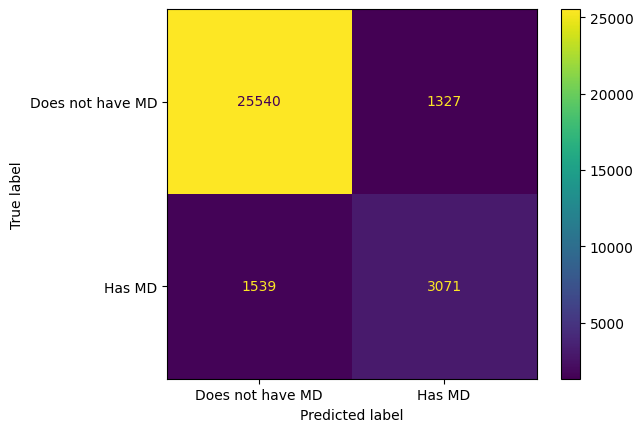

In [13]:
# Confusion Matrix fro basic tree
cm= confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, 
                      display_labels=['Does not have MD','Has MD'])

disp.plot()

# Cost Complexity Pruning - Visualize alpha

Instead of fine tuning multiple hyperparameters, we use alpha to fine tune the entire tree. The best value of alpha is found out by plotting alpha and accuracy 

In [14]:
path=clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas[1950:-2] # finding all possible values of alpha a hyperparamter
# alpha value was selected between 2150 to 2200 after plotting alpha vs accuracy plot
all_clf_dt=[]

for a in ccp_alphas:
    clf_dt=DecisionTreeClassifier(ccp_alpha=a)
    clf_dt.fit(X_train,y_train)
    all_clf_dt.append(clf_dt)


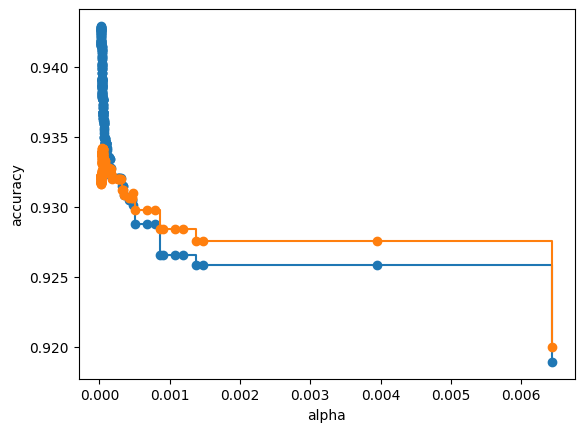

In [15]:
train_score = [clf_dt.score(X_train,y_train) for clf_dt in all_clf_dt]
test_score = [clf_dt.score(X_test,y_test) for clf_dt in all_clf_dt]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_label('Accuarcy vs alpha for training and testing sets')
ax.plot(ccp_alphas,train_score,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_score,marker='o',label='test',drawstyle='steps-post')
plt.show()

# Finding alpha value using Cross validation

<Axes: xlabel='alpha'>

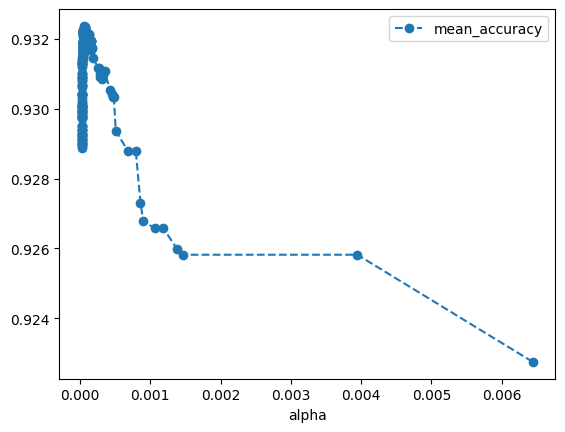

In [16]:
alpha_loop_values=[]
for a in ccp_alphas:
    clf_dt = DecisionTreeClassifier(ccp_alpha=a)
    scores = cross_val_score(clf_dt,X_train,y_train, cv=5)
    alpha_loop_values.append([a,np.mean(scores),np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,columns = ['alpha','mean_accuracy','Standard Deviation'])
alpha_results.plot(x='alpha',y='mean_accuracy',marker='o',linestyle='--')

In [17]:
alpha_results[(alpha_results['alpha']>0.00)
&
(alpha_results['alpha']<0.01)]

,alpha,mean_accuracy,Standard Deviation
0,0.000028,0.928984,0.001280
1,0.000028,0.928920,0.001140
2,0.000028,0.928878,0.001257
3,0.000028,0.929100,0.001255
4,0.000028,0.928973,0.001323
...,...,...,...
222,0.001188,0.926569,0.001765
223,0.001381,0.925987,0.001383
224,0.001470,0.925817,0.001528
225,0.003946,0.925817,0.001528


# Building Final Classification Tree

In [25]:
best_alpha_val=0.000028		
clf_dt_pruned = DecisionTreeClassifier(ccp_alpha=0.000028)
clf_dt_pruned= clf_dt.fit(X_train,y_train)

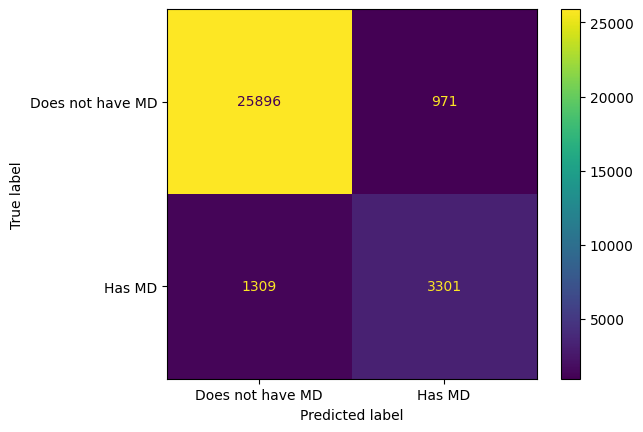

In [26]:
# New confusion matrix
y_pred=clf_dt_pruned.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, 
                      display_labels=['Does not have MD','Has MD'])

disp.plot()

[Text(0.6666666666666666, 0.875, 'Age <= 33.5\ngini = 0.243\nsamples = 94429\nvalue = [81039, 13390]\nclass = No MD'),
 Text(0.5, 0.625, 'Have you ever had suicidal thoughts ?_No <= 0.5\ngini = 0.499\nsamples = 24902\nvalue = [12988, 11914]\nclass = No MD'),
 Text(0.3333333333333333, 0.375, 'Job Satisfaction <= 2.5\ngini = 0.426\nsamples = 14856\nvalue = [4561, 10295]\nclass = Yes MD'),
 Text(0.16666666666666666, 0.125, 'gini = 0.371\nsamples = 12563\nvalue = [3089, 9474]\nclass = Yes MD'),
 Text(0.5, 0.125, 'gini = 0.46\nsamples = 2293\nvalue = [1472, 821]\nclass = No MD'),
 Text(0.6666666666666666, 0.375, 'gini = 0.27\nsamples = 10046\nvalue = [8427, 1619]\nclass = No MD'),
 Text(0.8333333333333334, 0.625, 'gini = 0.042\nsamples = 69527\nvalue = [68051, 1476]\nclass = No MD')]

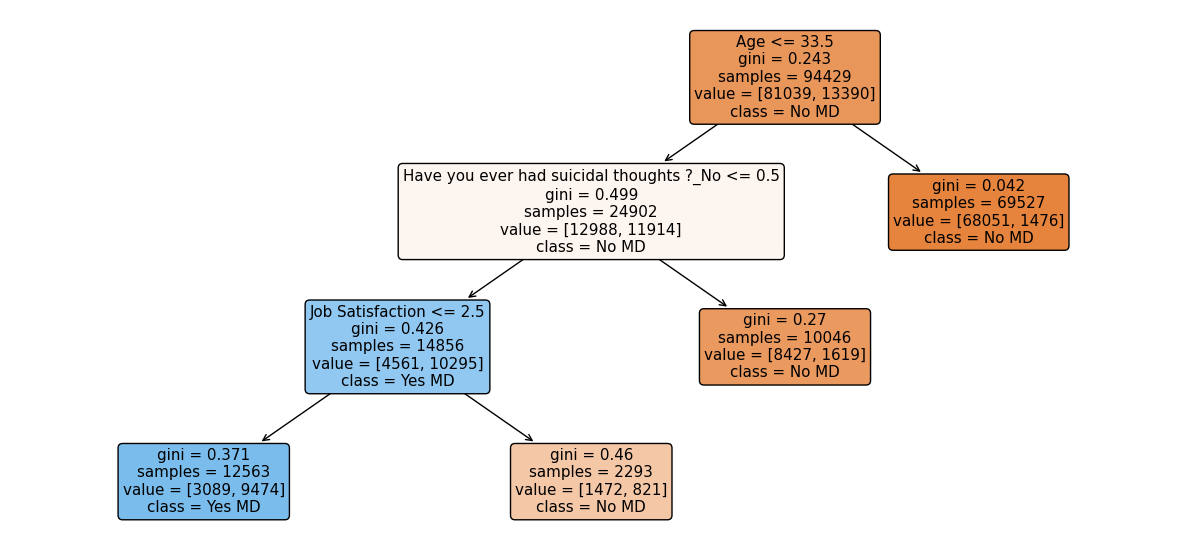

In [27]:
plt.figure(figsize=(15,7.))
plot_tree(clf_dt_pruned,filled=True,rounded=True,
          class_names=['No MD','Yes MD'],
         feature_names=X_encoded.columns)

# Submission

In [21]:
test=pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
ids= pd.DataFrame(test['id'])
# test.head()

In [22]:
test=test.drop(columns=['id','Name','Working Professional or Student'],axis=1)
test=test.drop(['Academic Pressure','Study Satisfaction','CGPA'],axis=1)
# test = test.dropna(subset=['Dietary Habits','Degree','Financial Stress'])
# Filling the missing values with the most frequent

#Profession
test.Profession.unique()
test['Profession']=test.Profession.str.lower()
most_freq_val = test.Profession.mode()[0]
test_prof_wrong_val=['yogesh','profession','familyvirar','patna','unveil','nagpur','pranav','visakhapatnam','yuvraj']
test['Profession']= test['Profession'].apply(lambda x :most_freq_val if x in test_prof_wrong_val or pd.isna(x) else x)

# Job Satisfaction
most_freq_val = test['Job Satisfaction'].mode()[0]
test['Job Satisfaction'] = test['Job Satisfaction'].apply(lambda x: most_freq_val if pd.isna(x) else x )

#Work Pressure
most_freq_val = test['Work Pressure'].mode()[0]
test['Work Pressure']=test['Work Pressure'].apply(lambda x : most_freq_val if pd.isna(x) else x)

#City
test['City']=test.City.str.lower()
wrong_city=['krishna', 'aishwarya', 'keshav', 'harsha', 'nalini', 'aditya', 'malyansh', 'raghavendra', 'saanvi', 
            'm.tech', 'bhavna', 'nandini', 'm.com', 'plata', 'atharv', 'pratyush', 'city', '3.0', 'less than 5 kalyan', 
            'mca', 'mira', 'moreadhyay', 'ishkarsh', 'kashk', 'mihir', 'vidya', 'tolkata', 'anvi', 'krinda', 'ayansh', 
            'shrey', 'ivaan', 'vaanya', 'gaurav', 'harsh', 'reyansh', 'kashish', 'kibara', 'vaishnavi', 'chhavi', 
            'parth', 'mahi', 'tushar', 'msc', 'no', 'rashi', 'me', 'molkata', 'researcher', 'kagan', 'armaan', 'ithal',
            'nalyan', 'dhruv','ayush', 'galesabad', 'itheg', 'aaradhya', 'pooja', 'khushi', 'khaziabad', 'jhanvi', 'unirar']
most_freq_city=test['City'].mode()[0]
test['City']=test.City.apply(lambda x :most_freq_city if x in wrong_city or pd.isna(x) else x)

#Sleep Duration
test['Sleep Duration']=test['Sleep Duration'].str.lower()
wrong_duration=['sleep_duration','40-45 hours','moderate','55-66 hours','indore','45','35-36 hours','no','10-6 hours'
               ,'49 hours', 'unhealthy', 'work_study_hours','45-48 hours', '9-5', 'pune', '9-5 hours']
most_freq_dur=test['Sleep Duration'].mode()[0]
test['Sleep Duration']=test['Sleep Duration'].apply(lambda x : most_freq_dur if x in wrong_duration or pd.isna(x) else x)

#Diet
test['Dietary Habits']=test['Dietary Habits'].str.lower()
diet=['healthy','unhealthy','more healthy','less than healthy','no healthy', 'less healthy']
most_freq_diet=test['Dietary Habits'].mode()[0]
test['Dietary Habits']=test['Dietary Habits'].apply(lambda x : most_freq_diet if x not in diet or pd.isna(x) else x)

# Degree

test['Degree'] = test['Degree'].str.lower()

invalid_degrees = ['degree', '0', '20', 'class 12', 'class 11', 'm', 'b', 
                   'working professional', 'pihu', 'kalyan', 'plumber', 'brit', 
                   '5.61', '5.56', '7.06', '24', '8.56', '5.88', '29', 'b.student',
                   'b.3.79', 'mthanya', 'doctor', 'rca', 'advait', 'nalini', 'bhopal',
                   'bhavesh', 'jhanvi', 'ritik', 'unite', 'entrepreneur', 'vrinda',
                   'lata', 'marsh', 'esra', 'khush', 'badhya', 'brithika', 's.arch',
                   'hca', 'l.ed', 'b b.com','vivaan','aarav','navya',
       'mahika',  'esha','mihir']
most_freq_degree=test['Degree'].mode()[0]
test['Degree']=test['Degree'].apply(lambda x : most_freq_degree if x not in invalid_degrees or pd.isna(x) else x)

# Standardize common degree formats
test['Degree'] = test['Degree'].replace({
    'b.sc': 'bsc',
    'm.com': 'mcom',
    'bpharm': 'b.pharm',
    'mpharm': 'm.pharm',
    'll.com': 'llm',
    'm_tech': 'm.tech',
    'b.03': 'b.tech',
    'bba': 'bba',
    'barch': 'b.arch',
    'llb': 'llb',
    'msc': 'msc',
    'me': 'me',
    'mba': 'mba',
    'phd': 'phd'
})
test = pd.get_dummies(test,columns=['Gender','City','Profession','Sleep Duration','Dietary Habits',
'Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness'])
test.shape

(93800, 172)

In [23]:
# Adding missing columns in test
missing_columns = set(X_train.columns) - set(test.columns)
for col in missing_columns:
    if X_train[col].dtype == 'object':  # If the column is categorical
        test[col] = X_train[col].mode()[0]  # Filling with the most frequent value
    else:  # If the column is numerical
        test[col] = X_train[col].mean()
# Reordering the test dataset columns to match the training dataset
test = test[X_train.columns]

submit=pd.DataFrame(columns=['Depression'])
submit['Depression'] = clf_dt_pruned.predict(test)
submit = pd.concat([ids, submit], axis=1).reset_index(drop=True)


In [24]:
submit.to_csv("submission.csv", index=False)